# Description

In this notebook, I will explore the built model translation from English to VietNamese

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:   print(e)

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import regex as re
import string
import nltk
from sklearn.model_selection import train_test_split

from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset
import tensorflow_text as tf_text

from utils.read_file_utils import *
from utils.model_utils import *
from utils.visualize_util import *

2024-11-10 12:12:38.401215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 12:12:38.401236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 12:12:38.401250: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/necphy/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
PATH_MODEL_TRANSLATOR = "translator"
PATH_TOKENIZER = r"data/tokeninzer_en_vi_converter"

# 1. Load model

In [3]:
translator = tf.saved_model.load(PATH_MODEL_TRANSLATOR)
tokenizers = tf.saved_model.load(PATH_TOKENIZER)

In [7]:
sentence = 'Hanoi, the capital of Vietnam, is known for its centuries-old architecture and a rich culture with Southeast Asian, Chinese and French influences.'
sentence = sentence.lower()

translated_text, translated_tokens, attention_weights, list_predicted_prob = translator(tf.constant(sentence))
translated_text = translated_text.numpy().decode('utf-8')
print(translated_text)

hà nội , thủ đô việt nam , được biết đến với kiến trúc lâu năm thế kỷ và một nền văn hoá giàu có với ảnh hưởng của đông nam á , trung quốc và pháp .


We can visualize the attention map

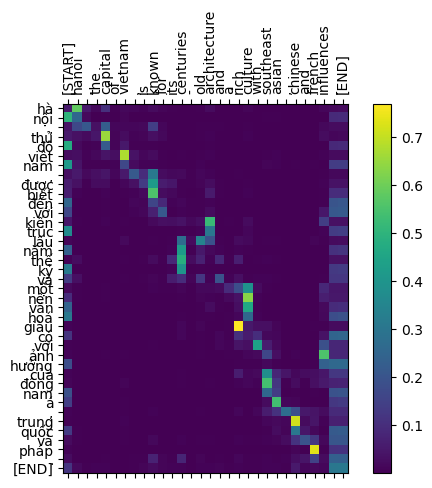

In [8]:
# Extract input sentence into tokens
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.en.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.en.lookup(in_tokens)[0]

# Get average attention map
average_attention_weights = calculate_average_attention(attention_weights[0])

plot_attention_head(in_tokens, translated_tokens, average_attention_weights)

- We can visualize the Translation Confidence Estimation

In [9]:
visualize_confidence_estimation(translated_tokens[1:], list_predicted_prob)

   [INFO] Threshold entropy: 2.6812
Token: hà, Entropy: 0.0878, High confidence
Token: nội, Entropy: 0.1127, High confidence
Token: ,, Entropy: 0.5230, High confidence
Token: thủ, Entropy: 0.9023, High confidence
Token: đô, Entropy: 0.4592, High confidence
Token: việt, Entropy: 0.7028, High confidence
Token: nam, Entropy: 0.0203, High confidence
Token: ,, Entropy: 0.3314, High confidence
Token: được, Entropy: 0.3882, High confidence
Token: biết, Entropy: 0.4031, High confidence
Token: đến, Entropy: 0.1022, High confidence
Token: với, Entropy: 0.4427, High confidence
Token: kiến, Entropy: 0.8989, High confidence
Token: trúc, Entropy: 0.0218, High confidence
Token: lâu, Entropy: 3.2373, Low confidence
Token: năm, Entropy: 1.9348, High confidence
Token: thế, Entropy: 2.6125, High confidence
Token: kỷ, Entropy: 0.1367, High confidence
Token: và, Entropy: 0.8199, High confidence
Token: một, Entropy: 1.5542, High confidence
Token: nền, Entropy: 0.4236, High confidence
Token: văn, Entropy: 0.